In [92]:
# importing critical libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf                # logistic regression

# Importing necessary model types for Classification model
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.linear_model   import LogisticRegression                              # logistic models
from sklearn.tree           import DecisionTreeClassifier     # regression trees
from sklearn.ensemble       import RandomForestClassifier     # random forest 


# Importing Machine Learning tools
from sklearn.model_selection import train_test_split,\
                                    RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import classification_report,\
                                    confusion_matrix,\
                                    mean_squared_error,\
                                    roc_auc_score

file = './train.csv'

train_data = pd.read_csv(file)

train_data.head(n=5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [64]:
#____/ Splitting PassengerId (gggg_pp): group_id & personal_id

# placeholder list
placeholder_lst_Cabin = []

# looping over each row
for index, col in train_data.iterrows():
    
    # checking if 'Cabin' value is not null or NaN
    if not pd.isnull(train_data.loc[index, 'Cabin']):
        
        # separating each cabin data by '/'
        split_Cabin = train_data.loc[index, 'Cabin'].split(sep='/')
        
        # appending placeholder_lst with the results of the split
        placeholder_lst_Cabin.append(split_Cabin)
    
    # if 'Cabin' value is null or NaN, append a list with NaN values
    else:
        placeholder_lst_Cabin.append([np.nan, np.nan, np.nan])

# converting placeholder_lst into a DataFrame 
Cabin_df = pd.DataFrame(placeholder_lst_Cabin)

# renaming column of email_df
Cabin_df.rename(columns={0: 'deck_cabin', 1: 'Cabin_number', 2: 'side_cabin'}, inplace=True)

# concatenating email_domain with friends DataFrame
train_data = pd.concat([train_data, Cabin_df], axis=1)


In [65]:
train_data[['CryoSleep']].value_counts(normalize = True)
train_data['CryoSleep'].isnull().sum(axis = 0)
train_data['CryoSleep'] = train_data['CryoSleep'].fillna(False)

# changing bool to int for Transport
train_data['CryoSleep_int'] = 0

for index, value in train_data.iterrows():
    if train_data.loc[index,'CryoSleep'] == True:
        train_data.loc[index,'CryoSleep_int'] =1 
    else:
        train_data.loc[index,'CryoSleep_int'] =0


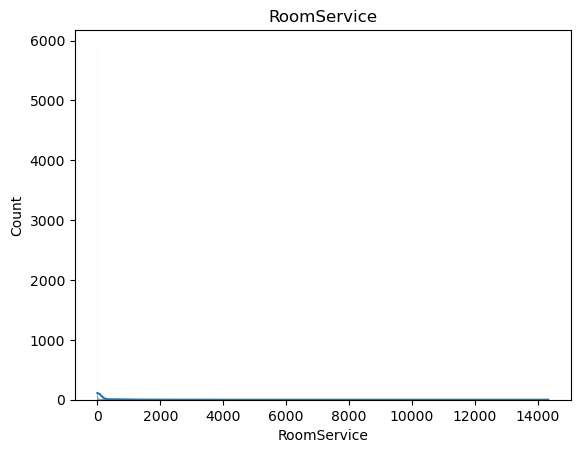

In [96]:
#Developing a HistogramPlot
sns.histplot(x = 'RoomService',
             data = train_data,
             kde = True)


# title and labels
plt.title('RoomService')
plt.xlabel('RoomService')
plt.ylabel('Count')

# displaying the plot
plt.show()

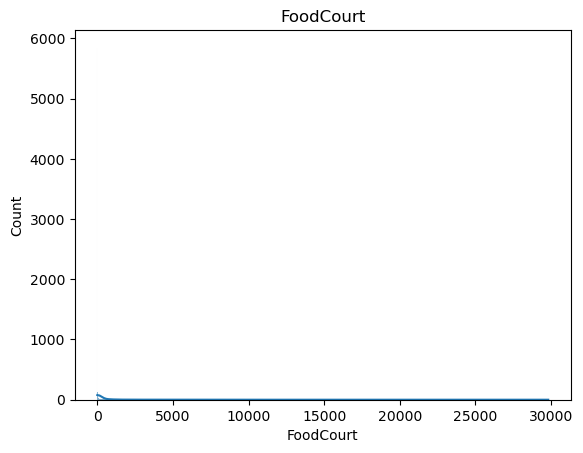

In [89]:
#Developing a HistogramPlot
sns.histplot(x = 'FoodCourt',
             data = train_data,
             kde = True)


# title and labels
plt.title('FoodCourt')
plt.xlabel('FoodCourt')
plt.ylabel('Count')

# displaying the plot
plt.show()

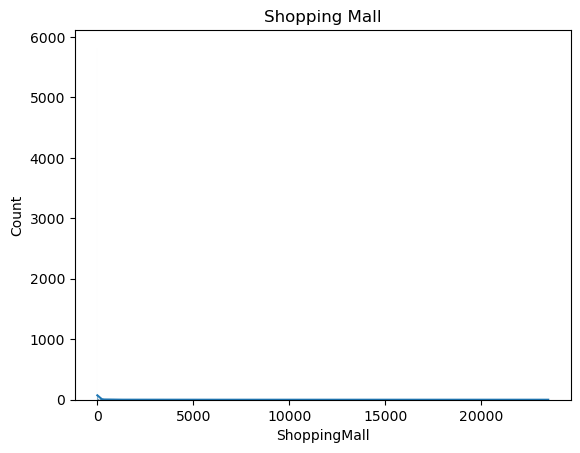

In [90]:
#Developing a HistogramPlot
sns.histplot(x = 'ShoppingMall',
             data = train_data,
             kde = True)


# title and labels
plt.title('Shopping Mall')
plt.xlabel('ShoppingMall')
plt.ylabel('Count')

# displaying the plot
plt.show()

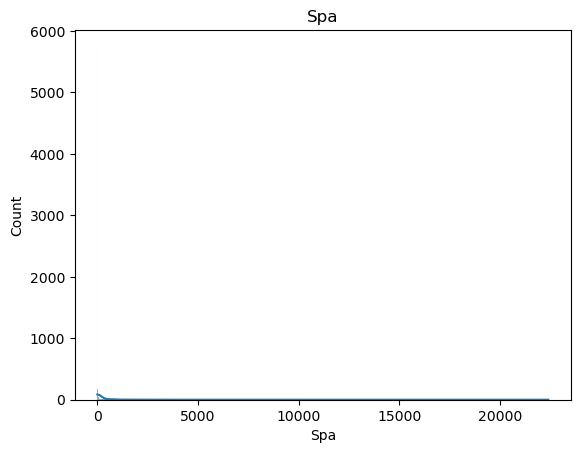

In [91]:
#Developing a HistogramPlot
sns.histplot(x = 'Spa',
             data = train_data,
             kde = True)


# title and labels
plt.title('Spa')
plt.xlabel('Spa')
plt.ylabel('Count')

# displaying the plot
plt.show()

In [ ]:
#Transfomring the Expenditure into a logarthimeic Version
train_data['Total_RoomService_log'] = np.log(train_data['RoomService'])


In [ ]:
for col in ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Expenditure']:
    X[col]=np.log(1+X[col])
    X_test[col]=np.log(1+X_test[col])

In [ ]:
train_data.groupby(['HomePlanet','Solo','Age_group'])['Expenditure'].mean().unstack().fillna(0)


In [ ]:
#Creating new column with the counts of group_id

train_data['group_id_count'] = train_data.groupby('group_id')['group_id'].transform('count')

# Creating new feature with family_1, stating which persons are part of a family

train_data['family_1'] = 0

for row, value in train_data.iterrows():
    if train_data.loc[row,'group_id_count'] > 1:
        train_data.loc[row, 'family_1'] = 1
    else:
        train_data.loc[row, 'family_1'] = 0

In [106]:
train_data.dtypes

PassengerId               object
HomePlanet                object
CryoSleep                 object
Cabin                     object
Destination               object
Age                      float64
VIP                       object
RoomService              float64
FoodCourt                float64
ShoppingMall             float64
Spa                      float64
VRDeck                   float64
Name                      object
Transported                 bool
Total_RoomService_log    float64
Cabin_full                object
dtype: object

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Age Group Tiers </strong><br>


In [5]:
# New features - training set
train_data['Age_group']=np.nan
train_data.loc[train_data['Age']<=12,'Age_group']='Age_0-12'
train_data.loc[(train_data['Age']>12) & (train_data['Age']<18),'Age_group']='Age_13-17'
train_data.loc[(train_data['Age']>=18) & (train_data['Age']<=25),'Age_group']='Age_18-25'
train_data.loc[(train_data['Age']>25) & (train_data['Age']<=30),'Age_group']='Age_26-30'
train_data.loc[(train_data['Age']>30) & (train_data['Age']<=50),'Age_group']='Age_31-50'
train_data.loc[train_data['Age']>50,'Age_group']='Age_51+'



In [55]:
train_data['Cabin_number'].value(counts)

0          0
1          0
2          0
3          0
4          1
        ... 
8688      98
8689    1499
8690    1500
8691     608
8692     608
Name: Cabin_number, Length: 8693, dtype: object

In [ ]:
# One-hot encode cabin regions
train_data['Cabin_region1']=(train_data['Cabin_number']<300).astype(int)
train_data['Cabin_region2']=((train_data['Cabin_number']>=300) & (train_data['Cabin_number']<600)).astype(int)
train_data['Cabin_region3']=((train_data['Cabin_number']>=600) & (train_data['Cabin_number']<900)).astype(int)
train_data['Cabin_region4']=((train_data['Cabin_number']>=900) & (train_data['Cabin_number']<1200)).astype(int)
data_train['Cabin_region5']=((data_train['Cabin_number']>=1200) & (train_data['Cabin_number']<1500)).astype(int)
train_data['Cabin_region6']=((train_data['Cabin_number']>=1500) & (train_data['Cabin_number']<1800)).astype(int)
train_data['Cabin_region7']=(train_data['Cabin_number']>=1800).astype(int)

In [6]:
train_data [['Age_group', 'HomePlanet','Transported'] ] . describe()

,Age_group,HomePlanet,Transported
count,8514,8492,8693
unique,6,3,2
top,Age_31-50,Earth,True
freq,2674,4602,4378


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Trend Based True Table  Expenditure </strong><br>

In [7]:
train_data['WorkingAge_Earth'] = 0

for index, value in train_data.iterrows():
    if train_data.loc[index,'Age_group'] == 'Age_31-50' and train_data.loc[index,'HomePlanet'] == 'Earth':
        train_data.loc[index,'WorkingAge_Earth'] = 1


In [8]:
train_data['WorkingAge_Earth'].value_counts()

0    7588
1    1105
Name: WorkingAge_Earth, dtype: int64

Text(0.5, 1.0, 'Age group distribution')

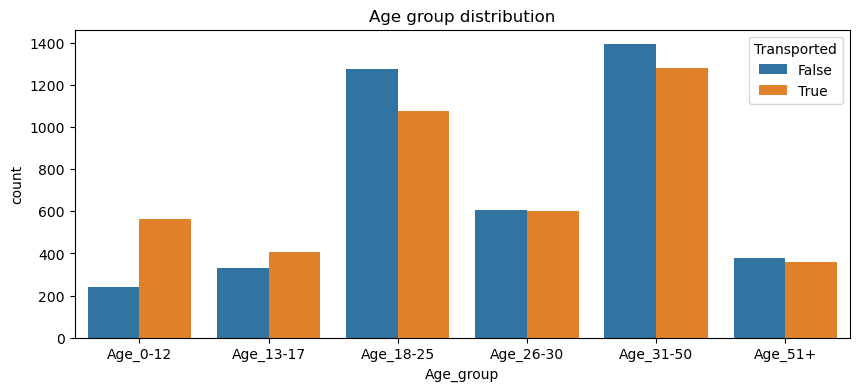

In [9]:
# Plot distribution of new features
plt.figure(figsize=(10,4))
g=sns.countplot(data=train_data, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17','Age_18-25','Age_26-30','Age_31-50','Age_51+'])
plt.title('Age group distribution')

In [10]:
# changing bool to int for Transport
train_data['Transported_int'] = 0

for index, value in train_data.iterrows():
    if train_data.loc[index,'Transported'] == True:
        train_data.loc[index,'Transported_int'] =1 
    else:
        train_data.loc[index,'Transported_int'] =0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Trend Based Features Total  Expenditure </strong><br>


(0.0, 20000.0)

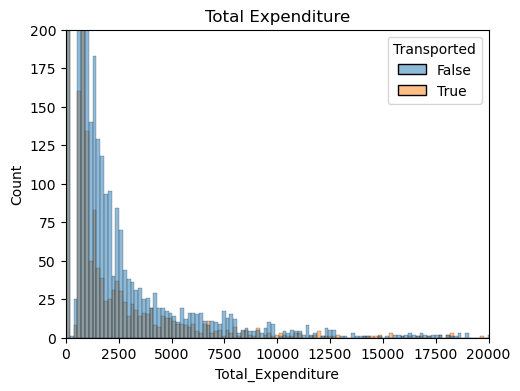

In [77]:
train_data['Total_Expenditure'] = train_data['RoomService'] + train_data['Spa'] + train_data['VRDeck'] + train_data['FoodCourt'] +train_data['ShoppingMall']  

fig=plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data=train_data, x='Total_Expenditure', hue='Transported', bins=200)
plt.title('Total Expenditure')
plt.ylim([0,200])
plt.xlim([0,20000])

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Trend Based Features No Expenditure </strong><br>

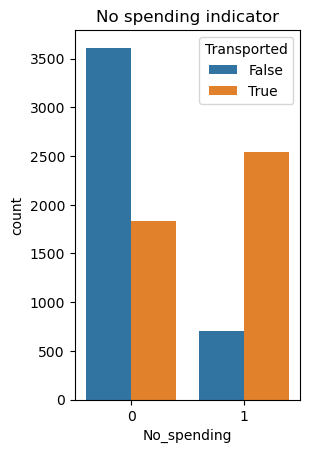

In [12]:
train_data['No_spending']=(train_data['Total_Expenditure']==0).astype(int)

plt.subplot(1,2,2)
sns.countplot(data=train_data, x='No_spending', hue='Transported')
plt.title('No spending indicator')
fig.tight_layout()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Trend Based Features If Solo </strong><br>

In [ ]:
# New feature
train_data['Solo']=(train_data['Group_size']==1).astype(int)
test_data['Solo']=(test['Group_size']==1).astype(int)

# New feature distribution
plt.figure(figsize=(10,4))
sns.countplot(data=train_data, x='Solo', hue='Transported')
plt.title('Passenger Solo')
plt.ylim([0,3000])

In [36]:
train_data['Transported_int']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported_int, Length: 8693, dtype: int64

In [ ]:
 #changing bool to int for Transport
train_data['Transported_int'] = 0

for index, value in train_data.iterrows():
    if train_data.loc[index,'Transported'] == True:
        train_data.loc[index,'Transported_int'] =1 
    else:
        train_data.loc[index,'Transported_int'] =0
df_corr = Transported_int.corr().round(2)

# selecting correlations with 'Transported_int'
Transported_corr = df_corr.loc[:, 'Transported_int']

# printing correlations of the new created Feature
print(f"""
---------------------
Transported
---------------------
{Transported_corr}
""")

In [ ]:
#____/ Splitting PassengerId (gggg_pp): group_id & personal_id

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in train_data.iterrows():
    
    # seperating each customer's email domain from their user name, using '@' as seperators
    split_PassengerId = train_data.loc[index, 'PassengerId'].split(sep = '_')
    
    # appending placeholder_lst with the results of the split
    placeholder_lst.append(split_PassengerId)
    

# converting placeholder_lst into a DataFrame 
PassengerId_df = pd.DataFrame(placeholder_lst)


# renaming column of email_df
PassengerId_df.rename(columns={0: 'group_id', 1: 'personal_id'}, inplace=True)


# concatenating email_domain with friends DataFrame
train_data = pd.concat([train_data, PassengerId_df], axis=1)
        


In [38]:
train_data['Cabin'] = train_data.groupby('group_id')['Cabin'].fillna(method='bfill').fillna(method='ffill')
train_data['VIP'] = train_data.groupby('group_id')['VIP'].fillna(method='bfill').fillna(method='ffill')


In [39]:
# HomePlanet : Replacing the missing values with other

train_data['new_HomePlanet'] = 0

for row, value in train_data.iterrows():
    train_data.loc[row,'new_HomePlanet'] = train_data.loc[row,'HomePlanet']
    
train_data["new_HomePlanet"].fillna("Other", inplace = True)
    
# Get_dummies features for the New_Homeplanet

HomePlanet_Dummies = pd.get_dummies(train_data['new_HomePlanet'], prefix='HomePlanet', prefix_sep='_')

train_data = pd.concat([train_data, HomePlanet_Dummies], axis = 1)

In [40]:
   
# Get_dummies features for the SideC_Dummies

DeckC_Dummies = pd.get_dummies(train_data['deck_cabin'], prefix='deck', prefix_sep='_')

train_data = pd.concat([train_data, DeckC_Dummies], axis = 1)

In [41]:
   
# Get_dummies features for the SideC_Dummies

SideC_Dummies = pd.get_dummies(train_data['side_cabin'], prefix='side', prefix_sep='_')

train_data = pd.concat([train_data, SideC_Dummies], axis = 1)

In [42]:
train_data['RoomService'] = train_data['RoomService'].fillna(train_data['RoomService'].mean())
train_data['FoodCourt'] = train_data['FoodCourt'].fillna(train_data['FoodCourt'].mean())
train_data['ShoppingMall'] = train_data['ShoppingMall'].fillna(train_data['ShoppingMall'].mean())
train_data['Spa'] = train_data['Spa'].fillna(train_data['Spa'].mean())
train_data['VRDeck'] = train_data['VRDeck'].fillna(train_data['VRDeck'].mean())  

train_data['Delux_Spend'] = train_data['RoomService'] + train_data['Spa'] + train_data['VRDeck']

In [107]:
# Calcukating the TOTAL number of ppl going to TRAPPIST

total_t = sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'].value_counts())
total_55 = sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'].value_counts())
total_PSO = sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'].value_counts())

# total_t_a = sum(train_data['Destination'][train_data['Destination']== 'TRAPPIST-1e'][train_data['deck_cabin']== 'A'].value_counts())

titanic_df['t_ratio'] = 0
titanic_df['f_ratio'] = 0
titanic_df['p_ratio'] = 0


for row, value in titanic_df.iterrows():
    if titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'A':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'A'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'B':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'B'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'C':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'C'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'D':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'D'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'E':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'E'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'F':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'F'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'G':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'G'].value_counts()))/total_t
    elif titanic_df.loc[row, 'Destination'] == 'TRAPPIST-1e' and titanic_df.loc[row, 'deck_cabin'] == 'T':
        titanic_df.loc[row, 't_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'TRAPPIST-1e'][titanic_df['deck_cabin']== 'T'].value_counts()))/total_t
    
for row, value in titanic_df.iterrows():
    if titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'A':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'A'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'B':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'B'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'C':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'C'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'D':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'D'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'E':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'E'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'F':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'F'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'G':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'G'].value_counts()))/total_55
    elif titanic_df.loc[row, 'Destination'] == '55 Cancri e' and titanic_df.loc[row, 'deck_cabin'] == 'T':
        titanic_df.loc[row, 'f_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== '55 Cancri e'][titanic_df['deck_cabin']== 'T'].value_counts()))/total_55
    
for row, value in titanic_df.iterrows():
    if titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'A':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'A'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'B':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'B'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'C':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'C'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'D':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'D'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'E':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'E'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'F':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'F'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'G':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'G'].value_counts()))/total_PSO
    elif titanic_df.loc[row, 'Destination'] == 'PSO J318.5-22' and titanic_df.loc[row, 'deck_cabin'] == 'T':
        titanic_df.loc[row, 'p_ratio'] = (sum(titanic_df['Destination'][titanic_df['Destination']== 'PSO J318.5-22'][titanic_df['deck_cabin']== 'T'].value_counts()))/total_55
    
        
            
    
    

# total_t

NameError: name 'titanic_df' is not defined

In [43]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0,0,0,0,0,1,0,0,0,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,1,0,0,0,0,0,0,0,0,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,1,0,0,0,0,0,0,0,1,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,1
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,0,0,0,0,0,0,1,0,0,1
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,0,0,0,0,1,0,0,0,0,1


In [ ]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula="""  Transported_int ~ 
                                             deck_cabin + 
                                             number_cabin + 
                                             side_cabin + 
                                             CryoSleep_int + 
                                             Age_group + 
                                             WorkingAge_Earth + 
                                             Total_Expenditure + 
                                             No_spending + 
                                             group_id + 
                                             personal_id + 
                                             HomePlanet_Earth + 
                                             HomePlanet_Europa + 
                                             HomePlanet_Mars + 
                                             deck_A + 
                                             deck_B + 
                                             deck_C + 
                                             deck_D + 
                                             deck_E + 
                                             deck_F + 
                                             deck_G + 
                                             side_P +  
                                             Delux_Spend  
                                          """,
                                      data=train_data)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

In [ ]:
for val in train_data:
    print(f" {val} + ")

In [ ]:
# creating a dictionary to store candidate features for model comparison

x_dict = {
    
    'data_sign' : [ 'VIP', 
                    'CryoSleep_int', 
                    'HomePlanet_Earth',
                    'HomePlanet_Europa',
                    'side_P',
                    'deck_B', 
                    'deck_C', 
                    'deck_F', 'Delux_Spend',
                    'Total_Expenditure',
                    'WorkingAge_Earth'
                   ],


}

In [ ]:
# Defining the independent variables (x) and the target variable (y)

x_full = train_data.loc[:, x_dict['data_sign']]

y_full = train_data.loc[:, 'Transported_int']

# Creation of variables containing the names of each model used (Formatting purpose for results)

name_knn = 'KNeighbors Classifier'
name_logreg = 'Logistic Regression'
name_tree = 'Decision Tree Classifier'
name_rfc = 'Random Forest Classifier'

# Splitting the data into train and test sets

x_full_train, x_full_test, y_full_train, y_full_test = train_test_split(x_full, 
                                                    y_full,
                                                    test_size=0.25,
                                                    random_state=219,
                                                    stratify = y_full)

# Scaling the data

# Initiating the model
scaler = StandardScaler()

# fitting and transforming the x_train data into scaled data
x_train_scaled = scaler.fit_transform(x_full_train)

# scaling the x_test data
x_test_scaled = scaler.transform(x_full_test)


# Initiating the Classification models Logistic Regression Default Model
model_logreg = LogisticRegression()
model_dt = DecisionTreeClassifier()
model_rfc = RandomForestClassifier()
model_knn = KNeighborsClassifier()

# Fitting the Classification Models
logreg_fit = model_logreg.fit(x_train_scaled, y_full_train)
dt_fit = model_dt.fit(x_train_scaled, y_full_train)
rfc_fit = model_rfc.fit(x_train_scaled, y_full_train)
knn_fit = model_knn.fit(x_train_scaled, y_full_train)


# Predicting target variable (y) based on the scaled testing set
y_pred_logreg = model_logreg.predict(x_test_scaled)
y_pred_dt = model_dt.predict(x_test_scaled)
y_pred_rf = model_rfc.predict(x_test_scaled)
y_pred_knn = model_knn.predict(x_test_scaled)

# Scoring the results of the fitted models

# Logistic Regression
train_score_logreg = logreg_fit.score(x_train_scaled, y_full_train)
test_score_logreg = logreg_fit.score(x_test_scaled,  y_full_test)
gap_logreg = abs(test_score_logreg - train_score_logreg)

# Decision Tree
train_score_dt = dt_fit.score(x_train_scaled, y_full_train)
test_score_dt = dt_fit.score(x_test_scaled,  y_full_test)
gap_dt = abs(test_score_dt - train_score_dt)

# Random Forest Classifier
train_score_rf = rfc_fit.score(x_train_scaled, y_full_train)
test_score_rf = rfc_fit.score(x_test_scaled,  y_full_test)
gap_rf = abs(test_score_rf - train_score_rf)

# K-Nearest Neighbors Classifier
train_score_knn = knn_fit.score(x_train_scaled, y_full_train)
test_score_knn = knn_fit.score(x_test_scaled,  y_full_test)
gap_knn = abs(test_score_knn - train_score_knn)


# For each model, printing:
#                          the train/test scoring results
#                          Confusion matrix 
#                          The Classification Report
#                          The AUC score

# Logistic Regression

# Train / Test model results
print(f"""
Model Name     : {name_logreg}
Train Score    : {train_score_logreg.round(decimals=3)}
Test Score     : {test_score_logreg.round(decimals=3)}
Train-Test Gap : {gap_logreg.round(decimals=3)}
""")

# Confusion Matrix
print(f'''\nConfusion Matrix
-----------------
{confusion_matrix(y_full_test, y_pred_logreg)}\n''')

# Classification Result
print(f'''\nClassification Report:
-----------------
{classification_report(y_full_test, y_pred_logreg)}\n''')

# The ROC curve (AUC score)
print(roc_auc_score(y_true  = y_full_test,
                    y_score = y_pred_logreg).round(decimals = 4))

print('---------------------------------------------------------')

#______________________________________________________________________________

# Decision Tree Classifier

# Train / Test model results
print(f"""
Model Name     : {name_tree}
Train Score    : {train_score_dt.round(decimals=3)}
Test Score     : {test_score_dt.round(decimals=3)}
Train-Test Gap : {gap_dt.round(decimals=3)}
""")

# Confusion Matrix
print(f'''\nConfusion Matrix
-----------------
{confusion_matrix(y_full_test, y_pred_dt)}\n''')

# Classification Result
print(f'''\nClassification Report:
-----------------
{classification_report(y_full_test, y_pred_dt)}\n''')

# The ROC curve (AUC score)
print(f'''\nROC AUC Score :
-----------------
{roc_auc_score(y_true  = y_full_test,
               y_score = y_pred_dt).round(decimals = 4)}\n''')

print('---------------------------------------------------------')


#______________________________________________________________________________

# Random Forest Classifier Model

# Train / Test model results
print(f"""
Model Name     : {name_rfc}
Train Score    : {train_score_rf.round(decimals=3)}
Test Score     : {test_score_rf.round(decimals=3)}
Train-Test Gap : {gap_rf.round(decimals=3)}
""")

# Confusion Matrix
print(f'''\nConfusion Matrix
-----------------
{confusion_matrix(y_full_test, y_pred_rf)}\n''')

# Classification Result
print(f'''\nClassification Report:
-----------------
{classification_report(y_full_test, y_pred_rf)}\n''')

# The ROC curve (AUC score)
print(f'''\nROC AUC Score :
-----------------
{roc_auc_score(y_true  = y_full_test,
               y_score = y_pred_rf).round(decimals = 4)}\n''')

print('---------------------------------------------------------')

#______________________________________________________________________________

# K-Nearest Neighbors Model

# Train / Test model results
print(f"""
Model Name     : {name_knn}
Train Score    : {train_score_knn.round(decimals=3)}
Test Score     : {test_score_knn.round(decimals=3)}
Train-Test Gap : {gap_knn.round(decimals=3)}
""")

# Confusion Matrix
print(f'''\nConfusion Matrix
-----------------
{confusion_matrix(y_full_test, y_pred_knn)}\n''')

# Classification Result
print(f'''\nClassification Report:
-----------------
{classification_report(y_full_test, y_pred_knn)}\n''')

# The ROC curve (AUC score)
print(f'''\nROC AUC Score :
-----------------
{roc_auc_score(y_true  = y_full_test,
               y_score = y_pred_knn).round(decimals = 4)}\n''')
